# Euclid Galaxy Clusters Tutorial

This notebook demonstrates how to query and visualize Euclid Q1 MER mosaic data for galaxy clusters.

## Table of Contents
1. [Loading the Cluster Catalog](#loading-the-cluster-catalog)
2. [Random Cluster Selection](#random-cluster-selection)
3. [IRSA Data Querying](#irsa-data-querying)
4. [Multi-band Image Visualization](#multi-band-image-visualization)


## 1. Loading the Cluster Catalog

Let's start by importing the necessary libraries and loading our Euclid Q1 cluster catalog.


In [1]:
# Install required packages if needed
#!pip install astroquery fsspec requests aiohttp scikit-learn

# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.ipac.irsa import Irsa

from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch
from astropy.utils.data import download_file
import fsspec

from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Load the Euclid Q1 cluster catalog
df = pd.read_csv('euclid_q1_clusters.csv')

print(f"Dataset shape: {df.shape}")
df

Dataset shape: (35, 13)


NAME             ID   RAPZWav  DecPZWav  \
0   EUCL-Q1-CL J041113.88−481928.2   EUCL-Q1-CL-0   62.8089  -48.3245   
1   EUCL-Q1-CL J041724.90−474849.7   EUCL-Q1-CL-1   64.3521  -47.8150   
2   EUCL-Q1-CL J033747.63−275112.8   EUCL-Q1-CL-2   54.4491  -27.8497   
3   EUCL-Q1-CL J032321.22−275105.3   EUCL-Q1-CL-3   50.8371  -27.8549   
4   EUCL-Q1-CL J040151.05−502848.7   EUCL-Q1-CL-4   60.4686  -50.4780   
5   EUCL-Q1-CL J040558.72−491549.3   EUCL-Q1-CL-5   61.5018  -49.2626   
6   EUCL-Q1-CL J040655.77−480504.2   EUCL-Q1-CL-6   61.7282  -48.0850   
7   EUCL-Q1-CL J041343.51−480756.5   EUCL-Q1-CL-7   63.4322  -48.1305   
8   EUCL-Q1-CL J180607.67+635615.6   EUCL-Q1-CL-8  271.5285   63.9386   
9   EUCL-Q1-CL J040509.84−464902.4   EUCL-Q1-CL-9   61.2955  -46.8097   
10  EUCL-Q1-CL J035146.84−480404.3  EUCL-Q1-CL-10   57.9409  -48.0683   
11  EUCL-Q1-CL J034959.80−481952.6  EUCL-Q1-CL-11   57.5029  -48.3288   
12  EUCL-Q1-CL J035003.59−504145.7  EUCL-Q1-CL-12   57.5123  -50.6948   
13  EUCL-Q1-CL J033352.73−272113.8  EUCL-Q1-CL-13   53.4665  -27.3535   
14  EUCL-Q1-CL J032929.78−281930.3  EUCL-Q1-CL-14   52.3730  -28.3266   
15  EUCL-Q1-CL J033412.98−282418.7  EUCL-Q1-CL-15   53.5511  -28.4065   
16  EUCL-Q1-CL J033355.96−283807.7  EUCL-Q1-CL-16   53.4879  -28.6368   
17  EUCL-Q1-CL J040440.54−472444.6  EUCL-Q1-CL-17   61.1691  -47.4098   
18  EUCL-Q1-CL J033619.94−263512.9  EUCL-Q1-CL-18   54.0817  -26.5831   
19  EUCL-Q1-CL J033635.31−292553.3  EUCL-Q1-CL-19   54.1464  -29.4327   
20  EUCL-Q1-CL J041838.86−455252.9  EUCL-Q1-CL-20   64.6645  -45.8807   
21  EUCL-Q1-CL J033851.49−284807.8  EUCL-Q1-CL-21   54.7174  -28.7999   
22  EUCL-Q1-CL J042117.89−484550.8  EUCL-Q1-CL-22   65.3239  -48.7647   
23  EUCL-Q1-CL J033526.63−291824.9  EUCL-Q1-CL-23   53.8620  -29.3015   
24  EUCL-Q1-CL J175712.26+680259.0  EUCL-Q1-CL-24  269.3108   68.0460   
25  EUCL-Q1-CL J033538.84−270305.5  EUCL-Q1-CL-25   53.9143  -27.0511   
26  EUCL-Q1-CL J041109.36−490953.7  EUCL-Q1-CL-26   62.7910  -49.1650   
27  EUCL-Q1-CL J034251.87−491114.0  EUCL-Q1-CL-27   55.7173  -49.1902   
28  EUCL-Q1-CL J040406.81−481302.2  EUCL-Q1-CL-28   61.0243  -48.2198   
29  EUCL-Q1-CL J033055.76−294746.3  EUCL-Q1-CL-29   52.7296  -29.7977   
30  EUCL-Q1-CL J034001.03−284959.7  EUCL-Q1-CL-30   55.0111  -28.8358   
31  EUCL-Q1-CL J041839.71−483832.0  EUCL-Q1-CL-31   64.6662  -48.6298   
32  EUCL-Q1-CL J174731.98+663438.5  EUCL-Q1-CL-32  266.8740   66.5803   
33  EUCL-Q1-CL J181458.48+645725.1  EUCL-Q1-CL-33  273.7412   64.9563   
34  EUCL-Q1-CL J040332.81−482819.1  EUCL-Q1-CL-34   60.8779  -48.4695   

     RAAMICO  DecAMICO  zPZWav  zAMICO        zspec Nzspec  SNRPZWav  \
0    62.8067  -48.3245    0.41    0.40            -      -     40.81   
1    64.3554  -47.8127    0.55    0.56            -      -     24.20   
2    54.4478  -27.8574    0.49    0.48  0.535±0.004     10     23.43   
3    50.8397  -27.8481    0.42    0.41            -      -     22.61   
4    60.4568  -50.4824    0.43    0.42            -      -     22.38   
5    61.4875  -49.2648    0.31    0.30            -      -     22.21   
6    61.7365  -48.0840    0.69    0.70            -      -     22.14   
7    63.4304  -48.1343    1.47    1.46            -      -     21.74   
8   271.5355   63.9367    1.32    1.33            -      -     21.53   
9    61.2865  -46.8250    0.42    0.38            -      -     20.48   
10   57.9494  -48.0674    0.56    0.56            -      -     20.22   
11   57.4954  -48.3338    1.40    1.44            -      -     20.14   
12   57.5176  -50.6973    0.65    0.66            -      -     20.10   
13   53.4728  -27.3542    0.57    0.55  0.605±0.005      8     19.98   
14   52.3752  -28.3236    0.63    0.66  0.682±0.007     37     19.74   
15   53.5570  -28.4039    0.65    0.66  0.662±0.007     74     18.84   
16   53.4785  -28.6342    0.59    0.56  0.665±0.007     38     18.70   
17   61.1687  -47.4150    0.88    0.89            -      -     18.62   
18   54.0844  -26.5907    0.50   

## 2. Random Cluster Selection

Let's randomly select one cluster from our catalog to work with for the rest of this tutorial.


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Randomly select one cluster
cluster = df.sample(n=1).iloc[0]
cluster

NAME          EUCL-Q1-CL J041109.36−490953.7
ID                             EUCL-Q1-CL-26
RAPZWav                               62.791
DecPZWav                             -49.165
RAAMICO                               62.787
DecAMICO                            -49.1649
zPZWav                                  0.42
zAMICO                                  0.35
zspec                                      -
Nzspec                                     -
SNRPZWav                               16.42
SNRAMICO                               31.19
lambdaPmem                        31.01±5.12
Name: 26, dtype: object

## 3. IRSA Data Querying

Query Euclid Q1 MER mosaics from IRSA for the selected cluster.


In [4]:
# Create SkyCoord object and define search radius
cluster_coord = SkyCoord(ra=cluster['RAPZWav'], dec=cluster['DecPZWav'], unit='deg')
search_radius = 2.0  # arcminutes
im_cutout = 20.0 * u.arcmin  # 20 arcminutes for cluster analysis

# Query Euclid Q1 MER mosaics
mer_images = Irsa.query_sia(pos=(cluster_coord, search_radius * u.arcmin), collection='euclid_DpdMerBksMosaic')

# Filter for Euclid facility and science dataproduct_subtype
mer_images = mer_images[(mer_images['facility_name'] == 'Euclid') & (mer_images['dataproduct_subtype'] == 'science')]
mer_images

<Table length=4>
       s_ra             s_dec        facility_name ... o_ucd  upload_row_id
       deg               deg                       ...                     
     float64           float64           object    ... object     int64    
----------------- ------------------ ------------- ... ------ -------------
62.63341442956414 -48.99998611110919        Euclid ...                    1
62.63341442956414 -48.99998611110919        Euclid ...                    1
62.63341442956414 -48.99998611110919        Euclid ...                    1
62.63341442956414 -48.99998611110919        Euclid ...                    1

In [6]:
# Cutout parameters
coords_cutout = cluster_coord

# Create cache directory
cache_dir = 'euclid_cache'
os.makedirs(cache_dir, exist_ok=True)

# Get URLs for each band
vis_url = mer_images[mer_images['energy_bandpassname'] == 'VIS'][0]['access_url']
y_url = mer_images[mer_images['energy_bandpassname'] == 'Y'][0]['access_url']
j_url = mer_images[mer_images['energy_bandpassname'] == 'J'][0]['access_url']
h_url = mer_images[mer_images['energy_bandpassname'] == 'H'][0]['access_url']

# Download and cache images
cached_files = {}
for band, url in [('VIS', vis_url), ('Y', y_url), ('J', j_url), ('H', h_url)]:
    cache_file = os.path.join(cache_dir, f'{band}_{cluster["ID"]}.fits')
    if not os.path.exists(cache_file):
        print(f"Downloading {band} band...")
        # download_file returns the local path, we'll move it to our cache directory
        temp_file = download_file(url)
        import shutil
        shutil.move(temp_file, cache_file)
        cached_files[band] = cache_file
    else:
        print(f"Using cached {band} band")
        cached_files[band] = cache_file

# Create cutouts and store WCS
cutouts = {}
cutout_wcs = None
for band in ['VIS', 'Y', 'J', 'H']:
    hdu = fits.open(cached_files[band])
    cutout = Cutout2D(hdu[0].data, position=coords_cutout, size=im_cutout, wcs=WCS(hdu[0].header))
    cutouts[band] = cutout.data
    if band == 'VIS':  # Store WCS from VIS band
        cutout_wcs = cutout.wcs
    hdu.close()


## 4. Multi-band Image Visualization

Create cutouts and display VIS, Y, J, H bands plus RGB composite.


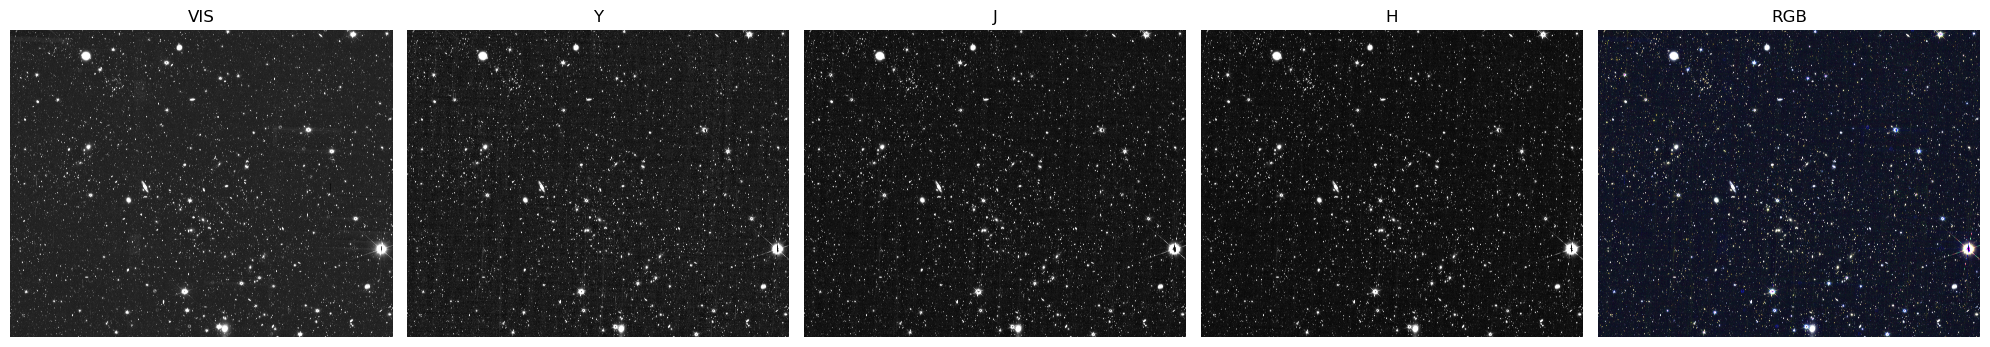

In [7]:
# Remove outliers and normalize each band individually
def remove_outliers_and_normalize(data, lower_percentile=5, upper_percentile=99):
    vmin = np.percentile(data, lower_percentile)
    vmax = np.percentile(data, upper_percentile)
    data_clipped = np.clip(data, vmin, vmax)
    data_norm = (data_clipped - vmin) / (vmax - vmin)
    return data_norm

# Normalize each band
norm_cutouts = {}
for band in ['VIS', 'Y', 'J', 'H']:
    norm_cutouts[band] = remove_outliers_and_normalize(cutouts[band])

# Create RGB (R=H, G=J, B=VIS)
rgb = np.dstack([norm_cutouts['H'], norm_cutouts['J'], norm_cutouts['VIS']])

# Plot 5 columns: VIS, Y, J, H, RGB
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
bands = ['VIS', 'Y', 'J', 'H']
titles = ['VIS', 'Y', 'J', 'H', 'RGB']

for i, (band, title) in enumerate(zip(bands, titles)):
    axes[i].imshow(norm_cutouts[band], cmap='gray', origin='lower')
    axes[i].set_title(title)
    axes[i].axis('off')

axes[4].imshow(rgb, origin='lower')
axes[4].set_title('RGB')
axes[4].axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Query galaxies in cluster region with BOX search
table_mer = 'euclid_q1_mer_catalogue'
table_phz = 'euclid_q1_phz_photo_z'

# Convert cutout size to degrees
cutout_deg = im_cutout.to(u.deg).value

adql = (f"SELECT DISTINCT mer.object_id, mer.ra, mer.dec, "
        f"phz.flux_vis_unif, phz.flux_y_unif, phz.flux_j_unif, phz.flux_h_unif, "
        f"phz.phz_classification, phz.phz_median, phz.phz_90_int1, phz.phz_90_int2 "
        f"FROM {table_mer} AS mer "
        f"JOIN {table_phz} as phz "
        f"ON mer.object_id = phz.object_id "
        f"WHERE 1 = CONTAINS(POINT('ICRS', mer.ra, mer.dec), "
        f"BOX('ICRS', {cluster['RAPZWav']}, {cluster['DecPZWav']}, {cutout_deg/np.cos(np.radians(cluster['DecPZWav']))}, {cutout_deg})) "
        f"AND phz.flux_vis_unif > 0 "
        f"AND phz.flux_y_unif > 0 "
        f"AND phz.flux_j_unif > 0 "
        f"AND phz.flux_h_unif > 0 "
        f"AND phz.phz_classification = 2 "
        f"AND ((phz.phz_90_int2 - phz.phz_90_int1) / (1 + phz.phz_median)) < 0.20 "
        f"AND phz.phz_median BETWEEN {cluster['zPZWav']-0.1} AND {cluster['zPZWav']+0.1}")

result_galaxies = Irsa.query_tap(adql).to_table()
print(f"Found {len(result_galaxies)} galaxies in cluster region")
# Query catalogs for the same tile
tile_id = mer_images[0]['obs_id']


# Convert to pandas DataFrame for easier viewing
df_galaxies = result_galaxies.to_pandas()
df_galaxies.head()


Found 873 galaxies in cluster region


object_id         ra        dec  flux_vis_unif  flux_y_unif  \
0 -630275628492701590  63.027563 -49.270159      11.614947    25.098370   
1 -626568645491434090  62.656865 -49.143409      26.066555    63.889478   
2 -625678102491207565  62.567810 -49.120757       9.904393    21.334492   
3 -628682772491384071  62.868277 -49.138407      85.678183   195.359627   
4 -626912364492092231  62.691236 -49.209223      49.681714   117.557351   

   flux_j_unif  flux_h_unif  phz_classification  phz_median  phz_90_int1  \
0    33.319144    43.445690                   2        0.51         0.30   
1    90.839565   116.410967                   2        0.38         0.36   
2    28.105802    35.139310                   2        0.48         0.24   
3   267.804550   333.353492                   2        0.34         0.29   
4   160.781194   196.224042                   2        0.34         0.25   

   phz_90_int2  
0         0.57  
1         0.41  
2         0.52  
3         0.44  
4         0.38

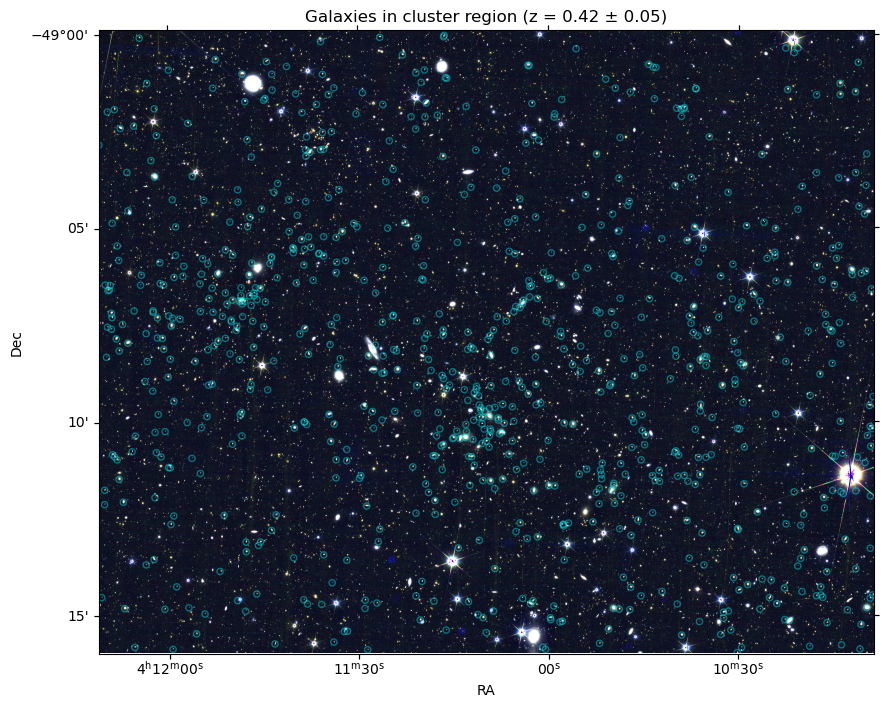

In [9]:
# Overlay galaxies on RGB image with proper WCS
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': cutout_wcs})

# Display RGB image
ax.imshow(rgb, origin='lower')

# Convert galaxy coordinates to pixel coordinates for plotting
galaxy_pixels = cutout_wcs.world_to_pixel_values(result_galaxies['ra'], result_galaxies['dec'])
# Filter galaxies to only show those within the image bounds
image_height, image_width = rgb.shape[:2]
valid_mask = ((galaxy_pixels[0] >= 0) & (galaxy_pixels[0] < image_width) & 
              (galaxy_pixels[1] >= 0) & (galaxy_pixels[1] < image_height))

valid_galaxies_x = galaxy_pixels[0][valid_mask]
valid_galaxies_y = galaxy_pixels[1][valid_mask]
# Overlay galaxies as red circles using pixel coordinates (only those within bounds)
ax.scatter(valid_galaxies_x, valid_galaxies_y, 
           s=20, facecolors='none', edgecolors='cyan', linewidth=1, alpha=0.4)

ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_title(f'Galaxies in cluster region (z = {cluster["zPZWav"]:.2f} ± 0.05)')
plt.show()


## 5. Cluster Finding Algorithm

Apply a simple machine learning clustering algorithm to identify galaxy clusters in the data.


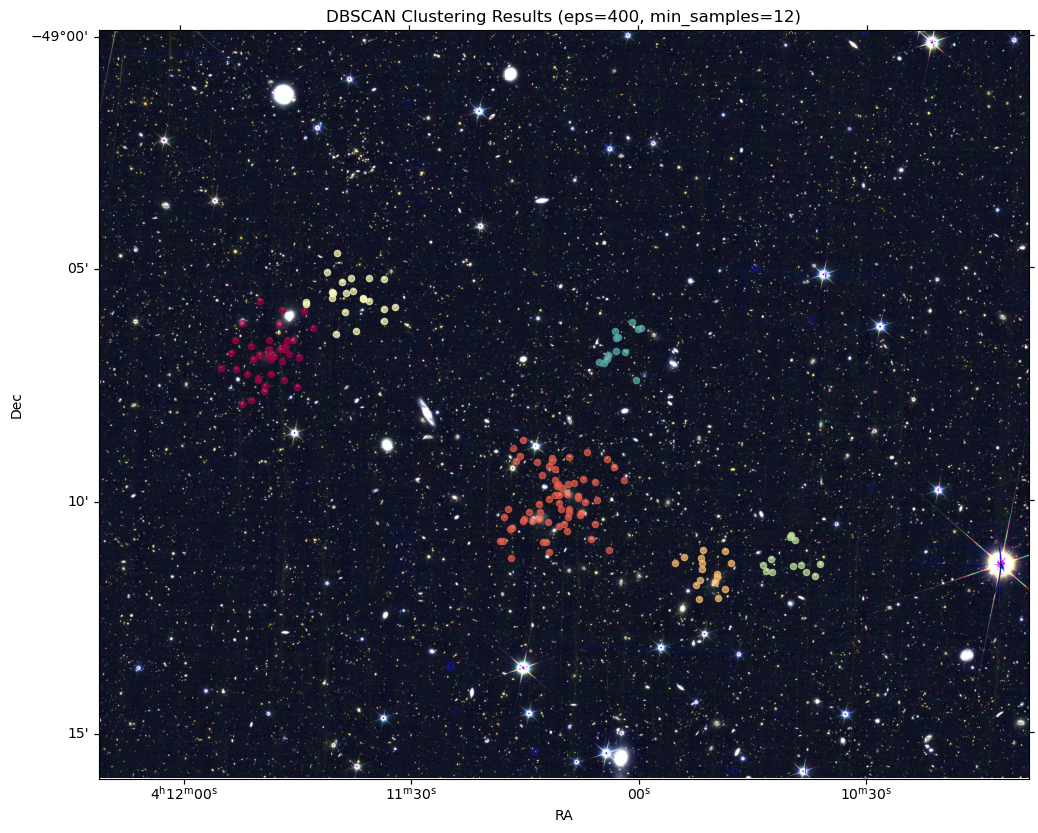

In [10]:

# Use the valid galaxies within image bounds for clustering
valid_galaxy_coords = np.column_stack([valid_galaxies_x, valid_galaxies_y])

# Apply DBSCAN clustering
# eps: maximum distance between two samples for one to be considered in the neighborhood
# min_samples: minimum number of samples in a neighborhood for a core point
eps = 400  # pixels - increased to connect the three central clusters
min_samples = 12  # minimum galaxies to form a cluster

clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(valid_galaxy_coords)
labels = clustering.labels_

# Count clusters (excluding noise points labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)


# Plot the clustering results
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': cutout_wcs})

# Display RGB image
ax.imshow(rgb, origin='lower')

# Plot galaxies colored by cluster
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise points
        col = 'black'
        marker = 'x'
        size = 10
        alpha = 0.3
    else:
        marker = 'o'
        size = 20
        alpha = 0.7
    
    class_member_mask = (labels == k)
    xy = valid_galaxy_coords[class_member_mask]
    
    ax.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, alpha=alpha)

ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_title(f'DBSCAN Clustering Results (eps={eps}, min_samples={min_samples})')
plt.show()

## 6. Control Field Analysis

Compare the cluster field with a control field (random area not centered on a known cluster) to test if the clustering is real or just random galaxy distribution.


In [11]:
# Select a control field (random area not centered on a known cluster)
# Let's pick a random location in the same tile but away from known clusters
np.random.seed(123)  # Different seed for control field

# Generate random coordinates within the same tile but away from our cluster
# Add some offset to ensure we're not overlapping with the cluster field
offset_ra = np.random.uniform(0.1, 0.3)  # 0.1-0.3 degrees offset
offset_dec = np.random.uniform(0.1, 0.3)  # 0.1-0.3 degrees offset

# Randomly choose direction for offset
if np.random.random() > 0.5:
    offset_ra = -offset_ra
if np.random.random() > 0.5:
    offset_dec = -offset_dec

control_ra = cluster['RAPZWav'] + offset_ra
control_dec = cluster['DecPZWav'] + offset_dec

print(f"Control field center: RA={control_ra:.6f}, Dec={control_dec:.6f}")
print(f"Distance from cluster: {np.sqrt(offset_ra**2 + offset_dec**2)*60:.1f} arcminutes")

# Create SkyCoord for control field
control_coord = SkyCoord(ra=control_ra, dec=control_dec, unit='deg')


Control field center: RA=63.030294, Dec=-49.322228
Distance from cluster: 17.2 arcminutes


In [12]:
# Query galaxies in the control field using the same criteria
control_cutout_deg = im_cutout.to(u.deg).value

control_adql = (f"SELECT DISTINCT mer.object_id, mer.ra, mer.dec, "
                f"phz.flux_vis_unif, phz.flux_y_unif, phz.flux_j_unif, phz.flux_h_unif, "
                f"phz.phz_classification, phz.phz_median, phz.phz_90_int1, phz.phz_90_int2 "
                f"FROM {table_mer} AS mer "
                f"JOIN {table_phz} as phz "
                f"ON mer.object_id = phz.object_id "
                f"WHERE 1 = CONTAINS(POINT('ICRS', mer.ra, mer.dec), "
                f"BOX('ICRS', {control_ra}, {control_dec}, {control_cutout_deg/np.cos(np.radians(control_dec))}, {control_cutout_deg})) "
                f"AND phz.flux_vis_unif > 0 "
                f"AND phz.flux_y_unif > 0 "
                f"AND phz.flux_j_unif > 0 "
                f"AND phz.flux_h_unif > 0 "
                f"AND phz.phz_classification = 2 "
                f"AND ((phz.phz_90_int2 - phz.phz_90_int1) / (1 + phz.phz_median)) < 0.20 "
                f"AND phz.phz_median BETWEEN {cluster['zPZWav']-0.1} AND {cluster['zPZWav']+0.1}")

control_galaxies = Irsa.query_tap(control_adql).to_table()
print(f"Found {len(control_galaxies)} galaxies in control field")


Found 691 galaxies in control field


In [13]:
# Create control field cutout and convert coordinates to pixels
# We'll use the same cutout size and WCS as the cluster field
# Reuse the cached files to avoid re-downloading
control_cutouts = {}
for band in ['VIS', 'Y', 'J', 'H']:
    hdu = fits.open(cached_files[band])
    cutout = Cutout2D(hdu[0].data, position=control_coord, size=im_cutout, wcs=WCS(hdu[0].header))
    control_cutouts[band] = cutout.data
    if band == 'VIS':  # Store WCS from VIS band
        control_cutout_wcs = cutout.wcs
    hdu.close()

# Create control field RGB
control_norm_cutouts = {}
for band in ['VIS', 'Y', 'J', 'H']:
    control_norm_cutouts[band] = remove_outliers_and_normalize(control_cutouts[band])

control_rgb = np.dstack([control_norm_cutouts['H'], control_norm_cutouts['J'], control_norm_cutouts['VIS']])

# Convert control field galaxy coordinates to pixel coordinates
control_galaxy_pixels = control_cutout_wcs.world_to_pixel_values(control_galaxies['ra'], control_galaxies['dec'])

# Filter control galaxies to only show those within the image bounds
control_image_height, control_image_width = control_rgb.shape[:2]
control_valid_mask = ((control_galaxy_pixels[0] >= 0) & (control_galaxy_pixels[0] < control_image_width) & 
                      (control_galaxy_pixels[1] >= 0) & (control_galaxy_pixels[1] < control_image_height))

control_valid_galaxies_x = control_galaxy_pixels[0][control_valid_mask]
control_valid_galaxies_y = control_galaxy_pixels[1][control_valid_mask]
print(f"Control galaxies within image bounds: {control_valid_mask.sum()} out of {len(control_galaxies)}")


Control galaxies within image bounds: 162 out of 691


In [14]:
# Apply DBSCAN clustering to control field
control_galaxy_coords = np.column_stack([control_valid_galaxies_x, control_valid_galaxies_y])

# Use the same DBSCAN parameters as the cluster field
control_clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(control_galaxy_coords)
control_labels = control_clustering.labels_

# Count clusters in control field
control_n_clusters = len(set(control_labels)) - (1 if -1 in control_labels else 0)
control_n_noise = list(control_labels).count(-1)

print(f"Control Field DBSCAN Results:")
print(f"Number of clusters found: {control_n_clusters}")
print(f"Number of noise points: {control_n_noise}")
print(f"Total galaxies analyzed: {len(control_galaxy_coords)}")

# Compare with cluster field results
print(f"\nComparison:")
print(f"Cluster field: {n_clusters} clusters, {n_noise} noise points")
print(f"Control field: {control_n_clusters} clusters, {control_n_noise} noise points")
print(f"Difference: {n_clusters - control_n_clusters} more clusters in cluster field")


Control Field DBSCAN Results:
Number of clusters found: 1
Number of noise points: 118
Total galaxies analyzed: 162

Comparison:
Cluster field: 6 clusters, 616 noise points
Control field: 1 clusters, 118 noise points
Difference: 5 more clusters in cluster field


NameError: name 'cluster_labels' is not defined

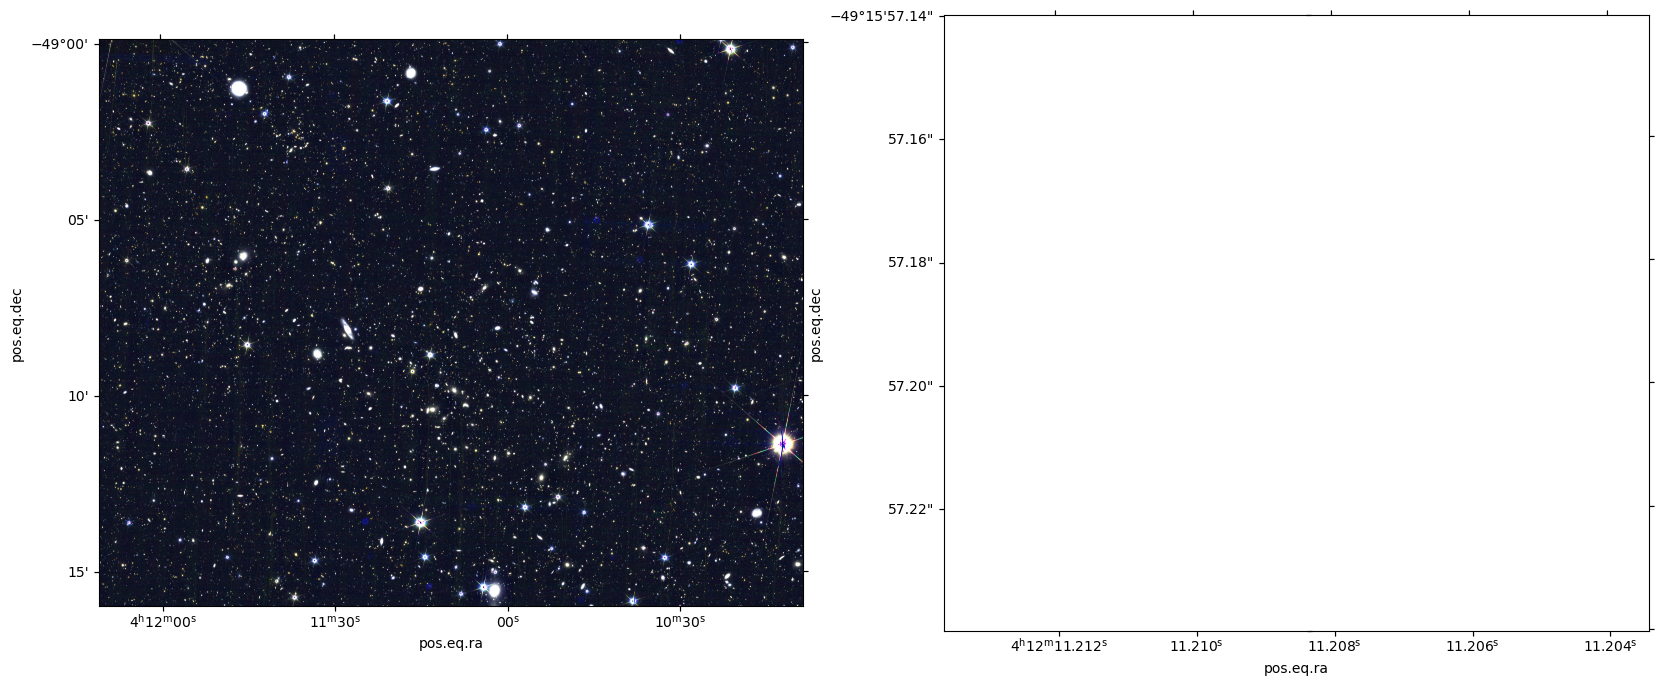

In [15]:
# Plot both fields side by side for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), 
                               subplot_kw={'projection': cutout_wcs})

# Cluster field
ax1.imshow(rgb, origin='lower')
cluster_unique_labels = set(cluster_labels)
cluster_colors = plt.cm.Spectral(np.linspace(0, 1, len(cluster_unique_labels)))

for k, col in zip(cluster_unique_labels, cluster_colors):
    if k == -1:
        col = 'black'
        marker = 'x'
        size = 10
        alpha = 0.3
    else:
        marker = 'o'
        size = 20
        alpha = 0.7
    
    class_member_mask = (cluster_labels == k)
    xy = valid_galaxy_coords[class_member_mask]
    ax1.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, alpha=alpha)

ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')
ax1.set_title(f'Cluster Field: {n_clusters} clusters, {n_noise} noise')

# Control field
ax2.imshow(control_rgb, origin='lower')
control_unique_labels = set(control_labels)
control_colors = plt.cm.Spectral(np.linspace(0, 1, len(control_unique_labels)))

for k, col in zip(control_unique_labels, control_colors):
    if k == -1:
        col = 'black'
        marker = 'x'
        size = 10
        alpha = 0.3
    else:
        marker = 'o'
        size = 20
        alpha = 0.7
    
    class_member_mask = (control_labels == k)
    xy = control_galaxy_coords[class_member_mask]
    ax2.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, alpha=alpha)

ax2.set_xlabel('RA')
ax2.set_ylabel('Dec')
ax2.set_title(f'Control Field: {control_n_clusters} clusters, {control_n_noise} noise')

plt.tight_layout()
plt.show()
